In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [8]:
#Load dataset into Dataframe
df=pd.read_csv("../Data/playground-series-s5e4/df_modeling.csv")

# Separate features and target
X =df.drop(["Listening_Time_minutes"],axis=1)

# Target : "Genre" column
y = df["Listening_Time_minutes"]

In [9]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 45)

In [10]:

# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((525000, 22), (225000, 22))

In [11]:
# Check the data type
X_train.dtypes


Episode_Length_minutes         float64
Host_Popularity_percentage     float64
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Genre_Comedy                      bool
Genre_Education                   bool
Genre_Health                      bool
Genre_Lifestyle                   bool
Genre_Music                       bool
Genre_News                        bool
Genre_Sports                      bool
Genre_Technology                  bool
Genre_True Crime                  bool
Publication_Day_Monday            bool
Publication_Day_Saturday          bool
Publication_Day_Sunday            bool
Publication_Day_Thursday          bool
Publication_Day_Tuesday           bool
Publication_Day_Wednesday         bool
Publication_Time_Evening          bool
Publication_Time_Morning          bool
Publication_Time_Night            bool
dtype: object

In [12]:
# Align test data to match training columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

## Random Forest  Regressor

In [13]:

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Model our data using RandomForestClassifier 
Model = RandomForestRegressor(n_estimators=100, random_state=45)

# Train the Model
Model.fit(X_train, y_train)

# Make Prediction
y_pred = Model.predict(X_test)

#Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 12.93
R² Score: 0.77


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### The RMSE score before random grid search is 12.93 with a R² Score: 0.77

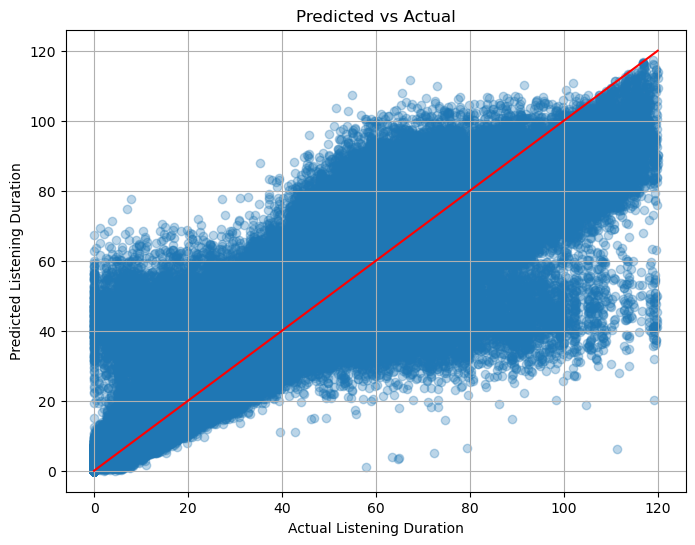

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Perfect prediction line
plt.xlabel("Actual Listening Duration")
plt.ylabel("Predicted Listening Duration")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

#### Now let try Random Forest Regressor with Random search

## Random Forest Regressor with Random Search

In [15]:
from sklearn.model_selection import RandomizedSearchCV
# Define hyperparameter distributions
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [17]:
rf = RandomForestRegressor(random_state=45)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
# Number of random combinations to try
    n_iter=10,  
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=45,
    verbose=2,
    n_jobs=-1)

In [18]:
 #Fit to training data
random_search.fit(X_train, y_train)

# Get best model
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.5s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=  36.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time= 1.1min
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time= 1.1min
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time= 1.1min
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=  35.9s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=  36.8s
[CV] END max_depth=1, min_samples

#### The best parameters found is n_estimators: 300, min_samples_split: 5, min_samples_leaf: 4, max_depth: 4

In [19]:
# Predict with best model
y_pred = best_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Tuned RMSE: {rmse:.2f}")
print(f"Tuned R² Score: {r2:.2f}")

Tuned RMSE: 13.54
Tuned R² Score: 0.75


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### After tuning my model, performance did not improve—in fact, it slightly degraded. The tuned RMSE was 13.54, and the tuned R² score was 0.75."
 

## Gradient Boosting Regressor

In [20]:
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=45)
# Fit to training dataset
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=45)

In [21]:
# Predict
y_pred = gb_reg.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting RMSE: {rmse:.2f}")
print(f"Gradient Boosting R² Score: {r2:.2f}")

Gradient Boosting RMSE: 13.20
Gradient Boosting R² Score: 0.76


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
# Define parameter space
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

In [24]:
# Randomized search setup
random_search_gbr = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

In [25]:
# Fit search
random_search_gbr.fit(X_train, y_train)

# Best model and parameters
best_gbr = random_search_gbr.best_estimator_
print("Best GBR parameters:", random_search_gbr.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time= 1.2min
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time= 1.2min
[CV] END learning_rate=0.2, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time= 1.7min
[CV] END learning_rate=0.2, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time= 1.7min
[CV] END learning_rate=0.2, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time= 1.7min
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time= 1.2min
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=200, subsample=0.6; total time= 2.4min
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=200, subsample=0.6; total time= 2.4min
[CV] END learn

In [26]:
# Evaluate best model
y_pred_best = best_gbr.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Gradient Boosting RMSE: {rmse_best:.2f}")
print(f"Tuned Gradient Boosting R² Score: {r2_best:.2f}")

Tuned Gradient Boosting RMSE: 13.10
Tuned Gradient Boosting R² Score: 0.77


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### After  using randow search the model preformed margin better, my tuned Gradient Boosting RMSE dropped to  13.10, while my tuned Gradient Boosting R² Score went up to 0.77

In [27]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"KNN RMSE: {rmse:.2f}")
print(f"KNN R² Score: {r2:.2f}")

KNN RMSE: 14.05
KNN R² Score: 0.73


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
from sklearn.model_selection import cross_val_score

#Evaluate K-Nearest Neighbors Regressor performance over a range of `k` values
#using cross-validated RMSE
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(f"k={k}: Avg RMSE = {-scores.mean():.2f}")

k=1: Avg RMSE = 17.79
k=2: Avg RMSE = 15.57
k=3: Avg RMSE = 14.77
k=4: Avg RMSE = 14.37
k=5: Avg RMSE = 14.13
k=6: Avg RMSE = 13.96
k=7: Avg RMSE = 13.85
k=8: Avg RMSE = 13.76
k=9: Avg RMSE = 13.69
k=10: Avg RMSE = 13.65
k=11: Avg RMSE = 13.61
k=12: Avg RMSE = 13.57
k=13: Avg RMSE = 13.55
k=14: Avg RMSE = 13.52
k=15: Avg RMSE = 13.50
k=16: Avg RMSE = 13.48
k=17: Avg RMSE = 13.46
k=18: Avg RMSE = 13.45
k=19: Avg RMSE = 13.44
k=20: Avg RMSE = 13.43


In [30]:
# Apply the optimal number of neighbors (best k) to the KNeighborsRegressor
best_k = 20  
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)

In [31]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Final KNN RMSE (k={best_k}): {rmse:.2f}")
print(f"Final KNN R² Score: {r2:.2f}")

Final KNN RMSE (k=20): 13.41
Final KNN R² Score: 0.76


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### After applying hyperparameter tuning to all three models, the K-Nearest Neighbors Regressor (with k=20) showed noticeable improvement, achieving a final RMSE of 13.41 and an R² score of 0.76. However, despite this progress, it did not outperform the Gradient Boosting Regressor and Random Forest Regressor, which remained the top-performing model even after Randomized Search optimization.

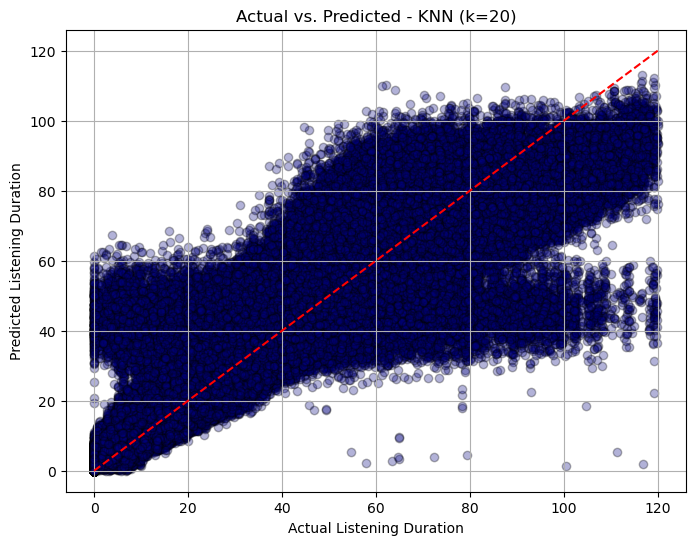

In [32]:
#Plot a scatter plot comparing actual and predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='navy', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Listening Duration")
plt.ylabel("Predicted Listening Duration")
plt.title(f"Actual vs. Predicted - KNN (k={best_k})")
plt.grid(True)
plt.show()


### Final Conclusion:

##### Among the models evaluated—Random Forest, K-Nearest Neighbors, and Gradient Boosting—the Gradient Boosting Regressor delivered the best performance after applying hyperparameter tuning through Randomized Search. While its improvement over the other models was modest, it consistently yielded the lowest RMSE and highest R² score, indicating a stronger ability to generalize to unseen data.